In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
#Uploaded files
city_data = '../city_data.csv'
ride_data = '../ride_data.csv'

#Read city and ride data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


#clean data
average_ride_cost = round(ride_data_df.groupby('city')['fare'].mean(),2)
number_of_rides = ride_data_df.groupby('city')['fare'].count()
total_fares = ride_data_df.groupby('city')['fare'].sum()
city = ride_data_df['city'].unique()
clean_ride_data=pd.DataFrame({'city':city,
                              'Fare Sales':total_fares,
                              'Number of Rides':number_of_rides,
                              'Average Ride':average_ride_cost})
clean_ride_data = clean_ride_data[['city','Number of Rides','Fare Sales','Average Ride']]
#Combine the data into a single dataset
merged_df = pd.merge(clean_ride_data,city_data_df,how='left',on='city')
merged_df = merged_df.rename(columns={'city':'City','driver_count':'Number of Drivers','type':'Type of City'})
merged_df['Fare Sales']=pd.to_numeric(merged_df['Fare Sales'])
merged_df['Average Ride']=pd.to_numeric(merged_df['Average Ride'])
merged_df.head()


/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: FutureWarning: 'city' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


,City,Number of Rides,Fare Sales,Average Ride,Number of Drivers,Type of City
0,Lake Jonathanshire,18,443.55,24.64,5,Urban
1,South Michelleport,22,557.31,25.33,72,Urban
2,Port Samanthamouth,16,582.76,36.42,57,Urban
3,Rodneyfort,18,593.21,32.96,34,Urban
4,South Jack,10,400.64,40.06,46,Urban


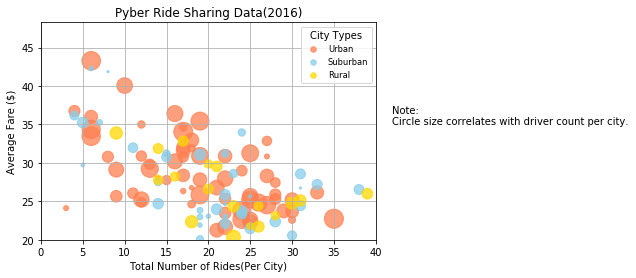

In [27]:
#bubble chart

#create filtered df for each city type
city_urban = merged_df.loc[merged_df['Type of City']=='Urban']
city_suburban = merged_df.loc[merged_df['Type of City']=='Suburban']
city_rural = merged_df.loc[merged_df['Type of City']=='Rural']

#Urban Scatter
x_axis = city_urban['Number of Rides']
y_axis = city_urban['Average Ride']
scalar_urban = city_urban.groupby(['City']).mean()['Number of Drivers']
urban_plot=plt.scatter(x_axis,y_axis,marker='o',facecolors='coral',s=scalar_urban*5, alpha=.75,label='Urban')

#suburban Scatter
x_axis_1 = city_suburban['Number of Rides']
y_axis_1=city_suburban['Average Ride']
scalar_suburban = city_suburban.groupby(['City']).mean()['Number of Drivers']
suburban_plot=plt.scatter(x_axis_1,y_axis_1,marker='o',facecolors='skyblue',s=scalar_suburban*5,alpha=.75,label='Suburban')


#rural Scatter 
x_axis_2=city_rural['Number of Rides']
y_axis_2=city_rural['Average Ride']
scalar_rural=city_rural.groupby(['City']).mean()['Number of Rides']
rural_plot=plt.scatter(x_axis_2,y_axis_2, marker='o',facecolors='gold',s=scalar_rural*5,alpha=.75,label='Rural')

plt.title('Pyber Ride Sharing Data(2016)')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylim(20,max(merged_df['Average Ride'])+5)
plt.xlim(0,max(merged_df['Number of Rides'])+1)
legend=plt.legend(loc='best',fontsize='small',mode='Expanded',numpoints=1,scatterpoints=1,title='City Types',labelspacing=.5)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

plt.text(42,35, '''Note:
Circle size correlates with driver count per city.''')

plt.grid(True)
plt.savefig('bubbleplot.png')
plt.show()

In [28]:

combined_data = pd.merge(ride_data_df,city_data_df, on='city', how='outer')

In [29]:
x_axis = np.arange(0,45,5)

urban = combined_data.loc[(combined_data['type']=='Urban')]
urban_data = urban[['driver_count','fare']]
urban_1 = [value for value in urban_data]

suburban = combined_data.loc[(combined_data['type']=='Suburban')]
suburban_data = suburban[['driver_count','fare']]

rural = combined_data.loc[(combined_data['type']=='Rural')]
rural_data=rural[['driver_count','fare']]



<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

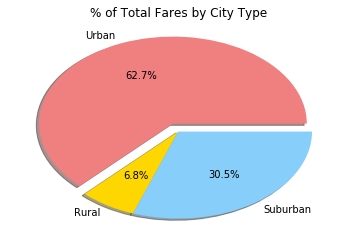

In [30]:
urban_fare_total = urban['fare'].sum()
suburban_fare_total =suburban['fare'].sum()
rural_fare_total = rural['fare'].sum()
total_fare = combined_data['fare'].sum()

urban_fare_percentage = urban_fare_total/total_fare
rural_fare_percentage = rural_fare_total/total_fare
suburban_fare_percentage = suburban_fare_total/total_fare
percentages = [urban_fare_percentage,rural_fare_percentage,suburban_fare_percentage]

labels= ['Urban','Rural','Suburban']
colors=['lightcoral','gold','lightskyblue']
explode=[0.1,0,0]
plt.pie(percentages, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',shadow='True', startangle=0)
plt.axis='equal'
plt.title('% of Total Fares by City Type')
plt.tight_layout

Text(0.5,1,'% of Total Rides by City Type')

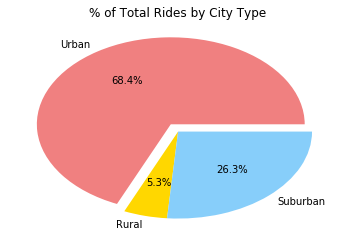

In [31]:
urban_total_rides=len(urban)
rural_total_rides = len(rural)
suburban_total_rides = len(suburban)

total_rides = len(combined_data)

urban_rides_percentage=urban_total_rides/total_rides
rural_rides_percentage=rural_total_rides/total_rides
suburban_rides_percentage=suburban_total_rides/total_rides

total_rides_percentages=[urban_rides_percentage,rural_rides_percentage,suburban_rides_percentage]

plt.pie(total_rides_percentages, explode=explode, labels=labels,colors=colors, autopct='%1.1f%%',startangle=0)
plt.axis='equal'
plt.title('% of Total Rides by City Type')

In [32]:
#sum_of_driver_count = combined_data['driver_count'].sum()

In [33]:
#urban_driver_percentage = urban['driver_count'].sum()/sum_of_driver_count
#rural_driver_percentage=rural['driver_count'].sum()/sum_of_driver_count
#suburban_driver_percentage=suburban['driver_count'].sum()/sum_of_driver_count

#driver_percentage_by_driver=[urban_driver_percentage,rural_driver_percentage,suburban_driver_percentage]

In [34]:
#plt.pie(driver_percentage_by_driver, explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=0)
#plt.axis='equal'
#plt.title('% of Total Drivers by City Type')

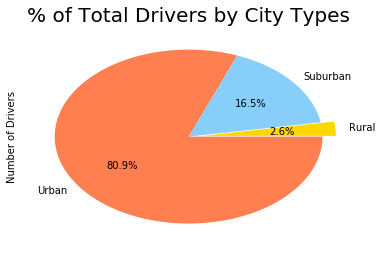

In [35]:
total_drivers_by_citytype = merged_df.groupby('Type of City')['Number of Drivers'].sum()
colorss = ['gold','lightskyblue','coral']
explode = explode
piechart_percentage_totaldrivers_by_city = total_drivers_by_citytype.plot(kind = 'pie', colors=colorss,  autopct='%1.1f%%',
                                                         explode =explode)

piechart_percentage_totaldrivers_by_city.set_title("% of Total Drivers by City Types", fontsize = 20)
plt.axis='equal'

